In [1]:
# Working with Border Entry data from Jan '96 to Feb'20.
# Will try to predict crossing type 'Measure'.
import pandas as pd

In [12]:
# Assigning file path as variable, then when calling file, assigning that as variable too:
file1 = 'C:/Users/kushnap/Desktop/Curtis School/Project 2/Border_Crossing_Entry_Data.csv'
df = pd.read_csv(file1)

In [13]:
# Let's look, shall we?
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [15]:
# Another type of look: the shape of it all:
df.shape

(355511, 7)

In [16]:
# Look at a sample of the data:
df.sample(5)

,Port Name,State,Port Code,Border,Date,Measure,Value
308089,Naco,AZ,2603,US-Mexico Border,3/1/1999 00:00,Personal Vehicle Passengers,68062
345445,Columbus,NM,2406,US-Mexico Border,9/1/1996 00:00,Train Passengers,0
51902,Eagle Pass,TX,2303,US-Mexico Border,7/1/2015 00:00,Truck Containers Empty,4769
48537,Columbus,NM,2406,US-Mexico Border,9/1/2015 00:00,Rail Containers Empty,0
246856,Beecher Falls,VT,206,US-Canada Border,4/1/2003 00:00,Rail Containers Empty,0


In [17]:
# Check for NaN/null values:
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

In [18]:
# Column 'Value' is the number of people crossing. Changing
# it to a more appropriate name:
df = df.rename({'Value':'People_Crossing'}, axis='columns')
df.head()

,Port Name,State,Port Code,Border,Date,Measure,People_Crossing
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [19]:
# Converting 'Date' to datetime:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,Port Name,State,Port Code,Border,Date,Measure,People_Crossing
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2020-02-01,Trucks,545


In [20]:
# Extract components from Date, then drop the original column:
df['Year_recorded'] = df['Date'].dt.year
df['Month_recorded'] = df['Date'].dt.month
df['Day_recorded'] = df['Date'].dt.day
df = df.drop(columns='Date')
df.head()

,Port Name,State,Port Code,Border,Measure,People_Crossing,Year_recorded,Month_recorded,Day_recorded
0,Alcan,AK,3104,US-Canada Border,Personal Vehicle Passengers,1414,2020,2,1
1,Alcan,AK,3104,US-Canada Border,Personal Vehicles,763,2020,2,1
2,Alcan,AK,3104,US-Canada Border,Truck Containers Empty,412,2020,2,1
3,Alcan,AK,3104,US-Canada Border,Truck Containers Full,122,2020,2,1
4,Alcan,AK,3104,US-Canada Border,Trucks,545,2020,2,1


In [21]:
# Splitting into train/test:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42)
train.shape, test.shape

((266633, 9), (88878, 9))

In [22]:
# Removing the dependant variable/target from test:
test = test.drop(columns='Measure')
train.shape, test.shape

((266633, 9), (88878, 8))

In [23]:
# Splitting train into train/val:
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                             stratify=train['Measure'], random_state=42)
train.shape, val.shape, test.shape

((213306, 9), (53327, 9), (88878, 8))

In [24]:
# Determining the majority class:
target = 'Measure'
y_train = train[target]
y_train.value_counts(normalize=True)

Personal Vehicle Passengers    0.088638
Personal Vehicles              0.088427
Trucks                         0.086983
Truck Containers Empty         0.086908
Truck Containers Full          0.086697
Buses                          0.083251
Bus Passengers                 0.082768
Pedestrians                    0.082393
Rail Containers Full           0.078887
Trains                         0.078577
Rail Containers Empty          0.078465
Train Passengers               0.078005
Name: Measure, dtype: float64

In [25]:
# Majority Class for every prediction:
majority_class = y_train.mode()[0]
y_pred_train = [majority_class]*len(y_train)

In [26]:
# Getting accuracy score:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.08863791923340178

In [27]:
y_val = val[target]
y_pred = [majority_class]*len(y_val)
accuracy_score(y_val, y_pred)

0.08864177621092505

In [29]:
import category_encoders as ce
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [30]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.464567667410505


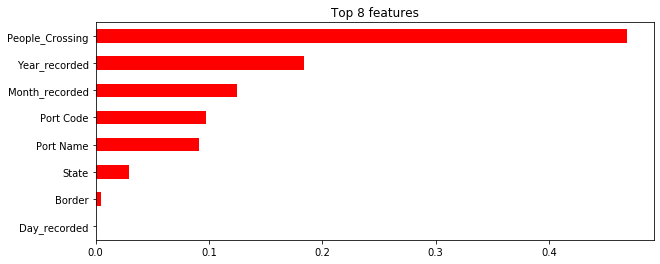

In [32]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
import matplotlib.pyplot as plt

n = 8
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='red');